(39717, 111)
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500   

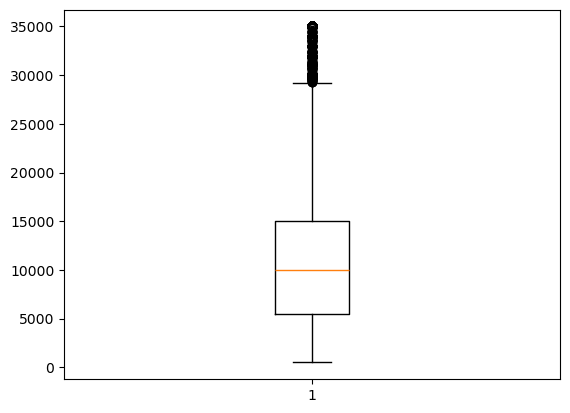

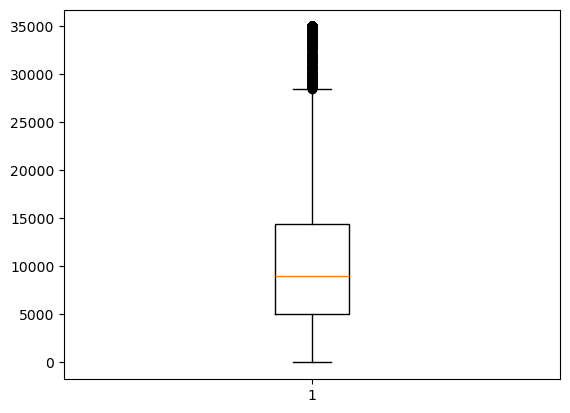

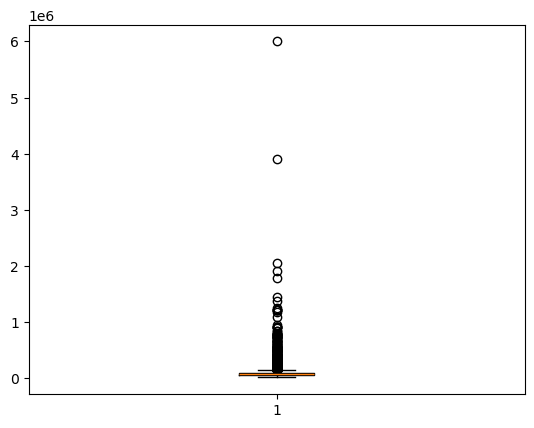

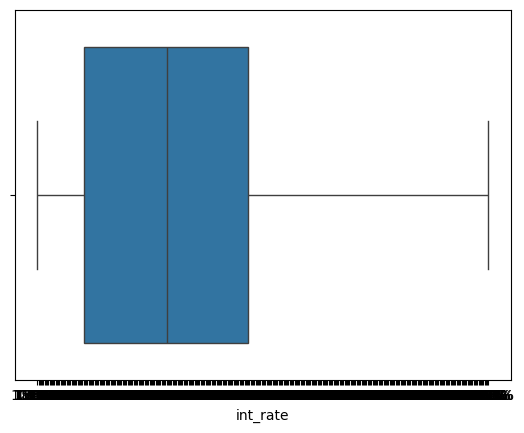

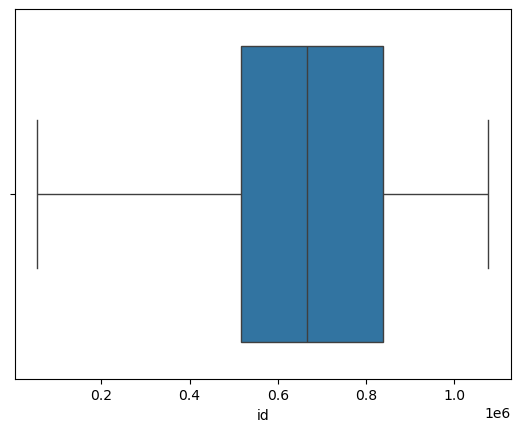

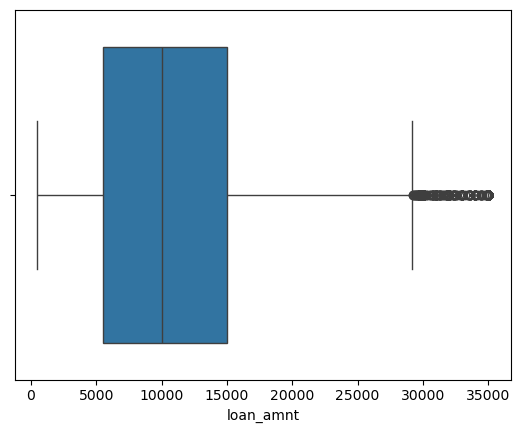

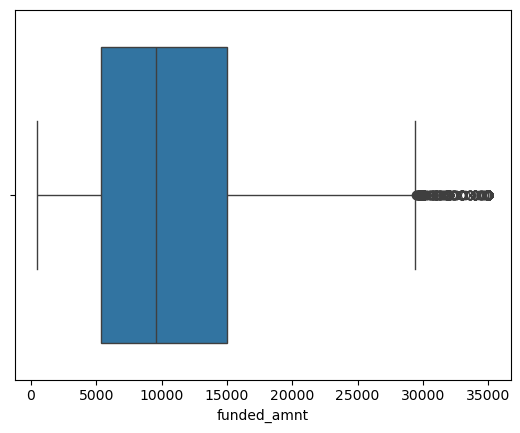

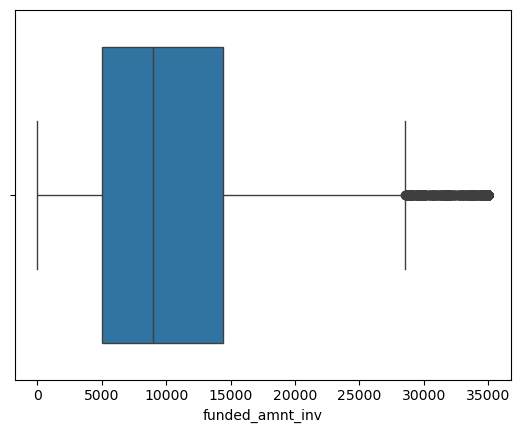

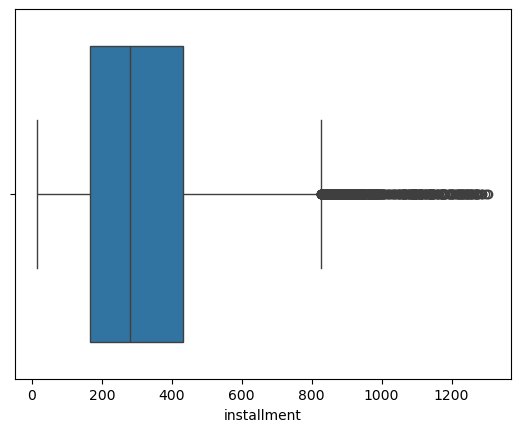

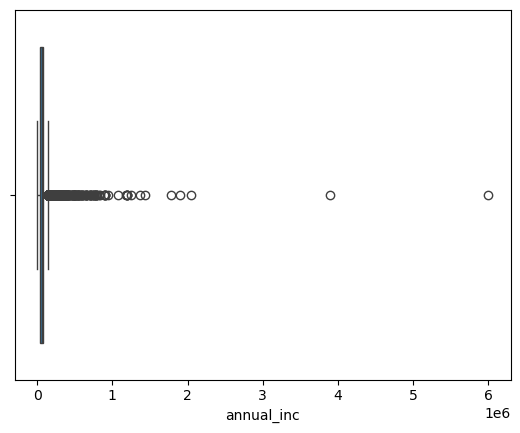

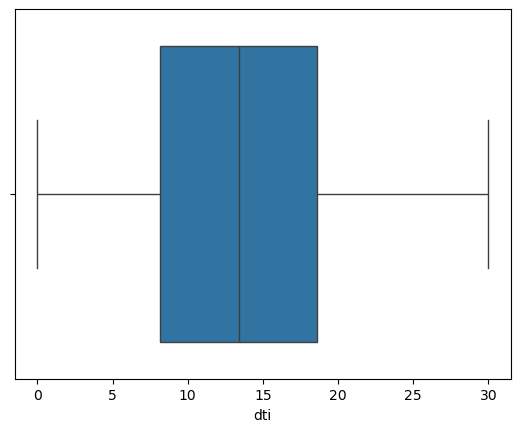

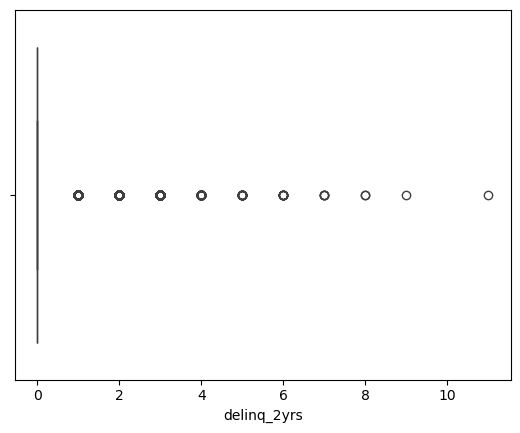

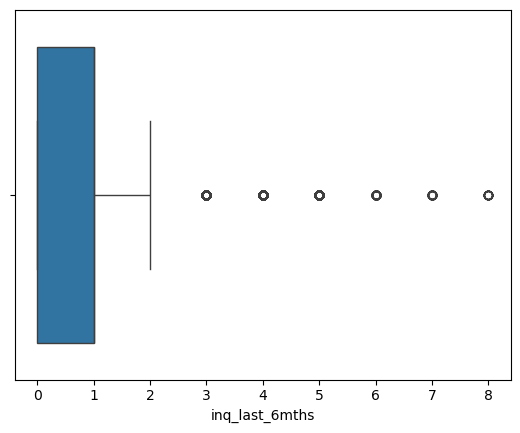

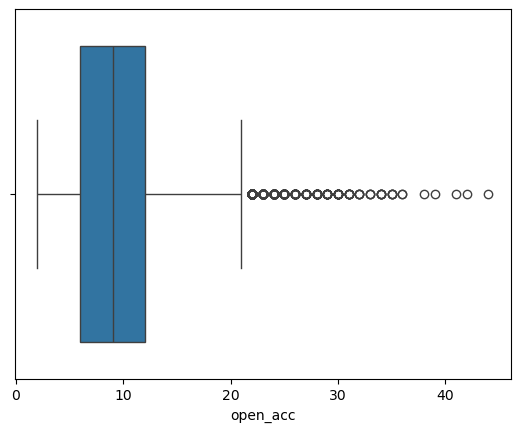

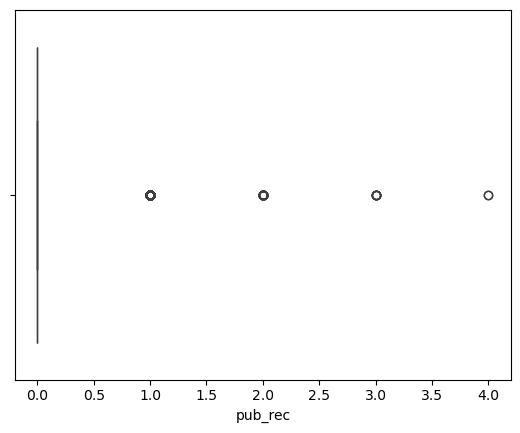

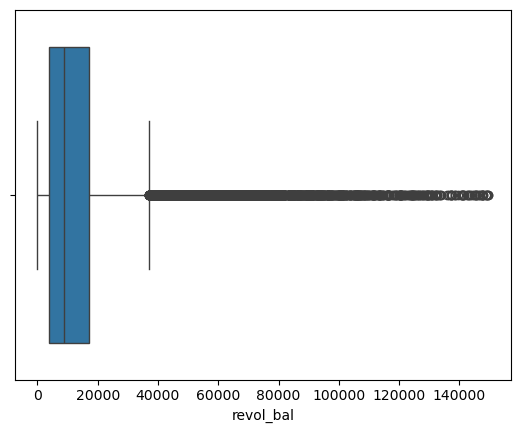

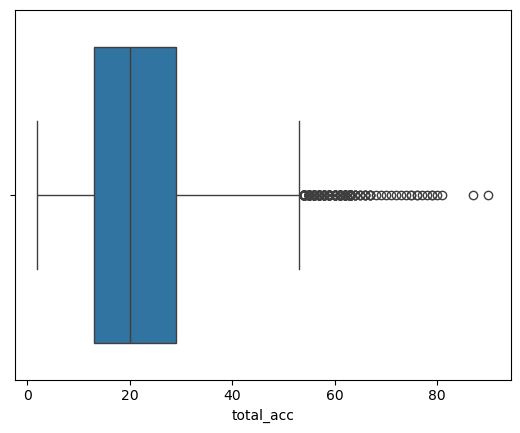

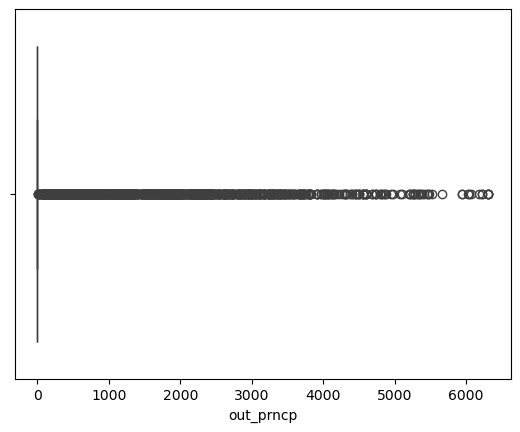

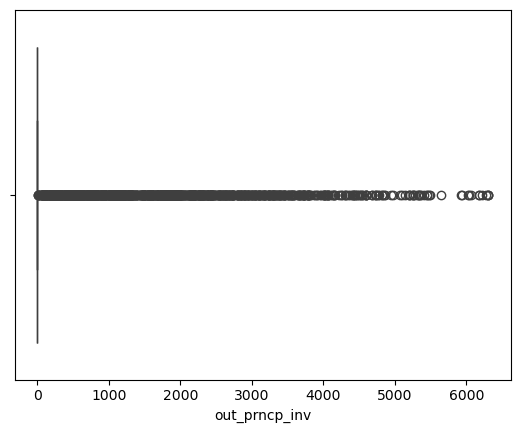

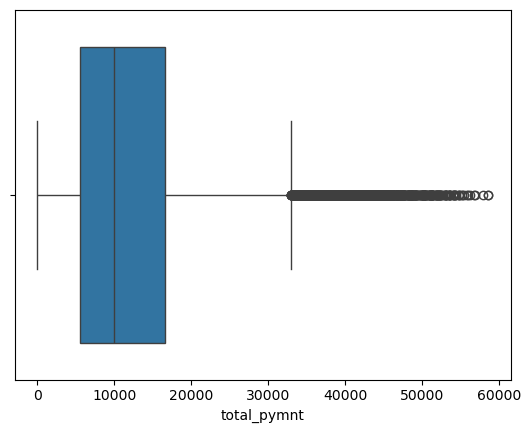

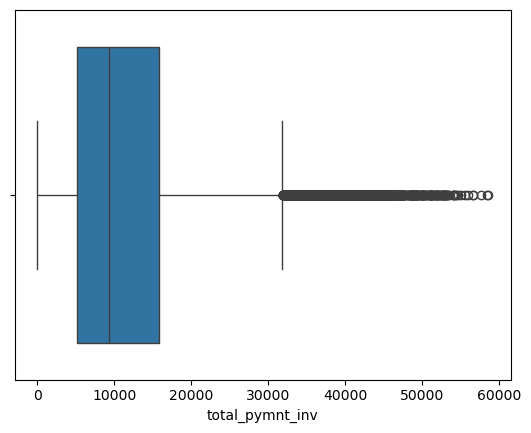

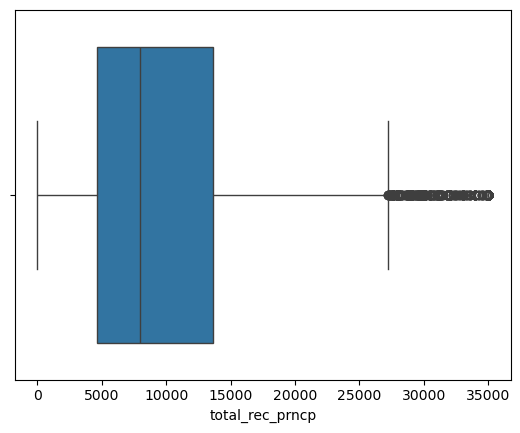

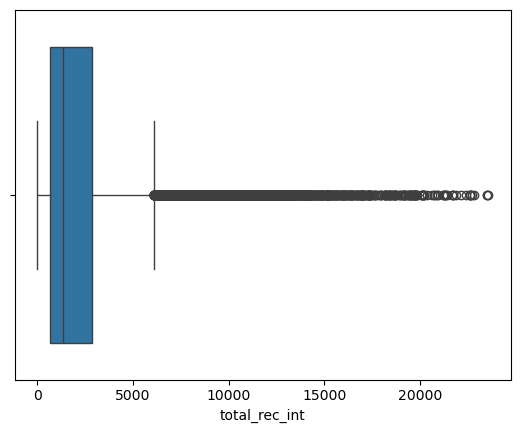

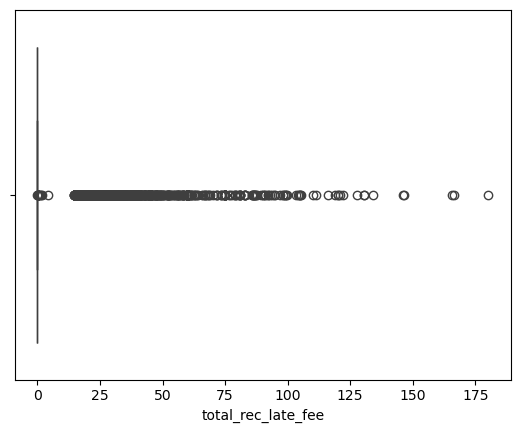

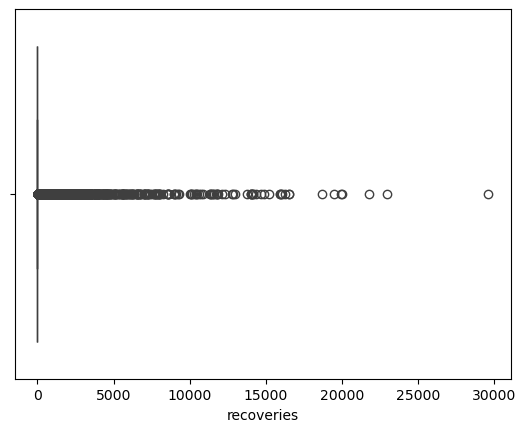

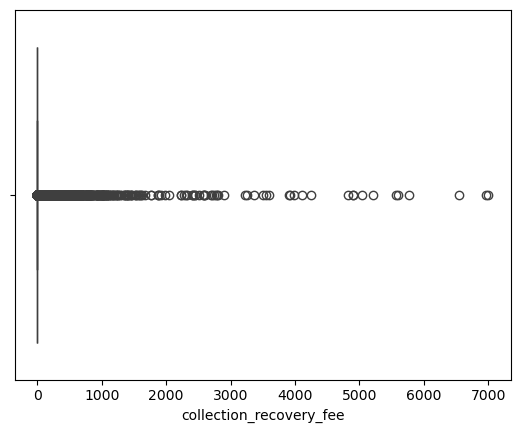

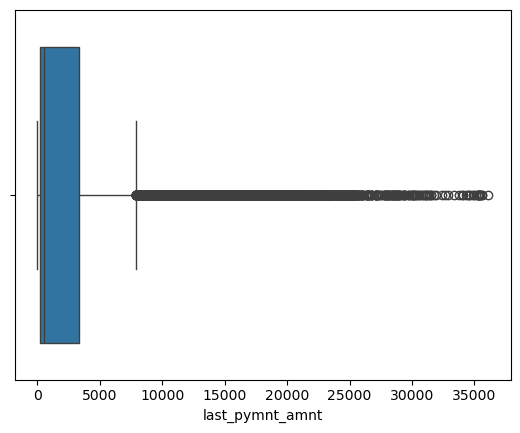

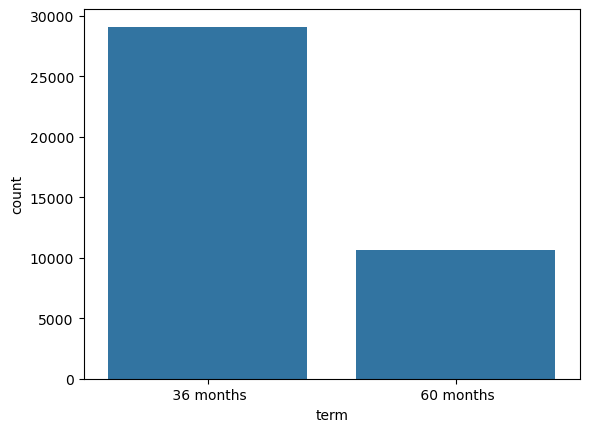

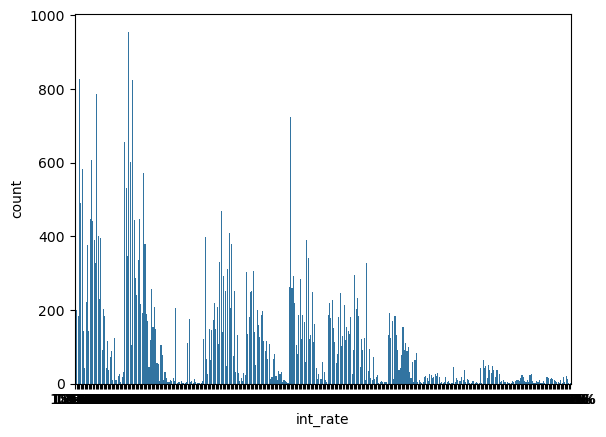

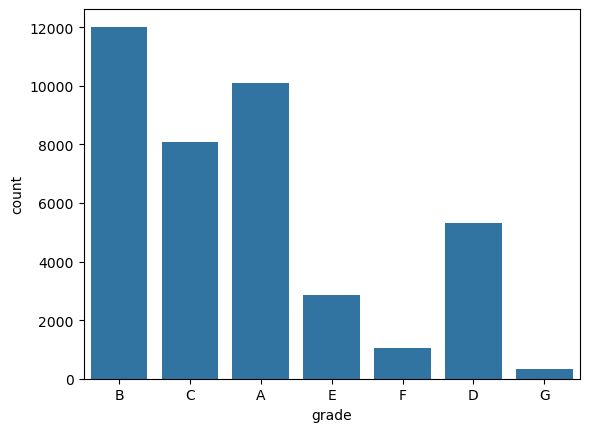

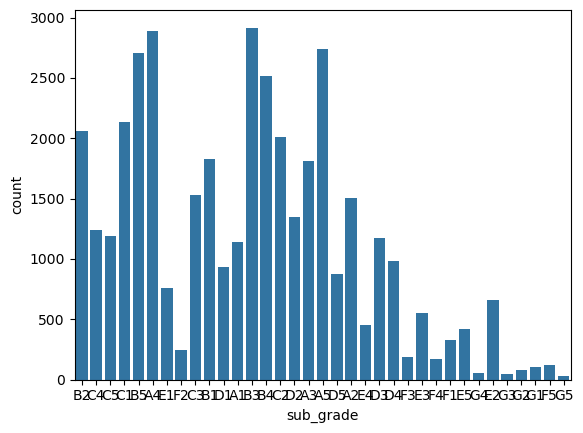

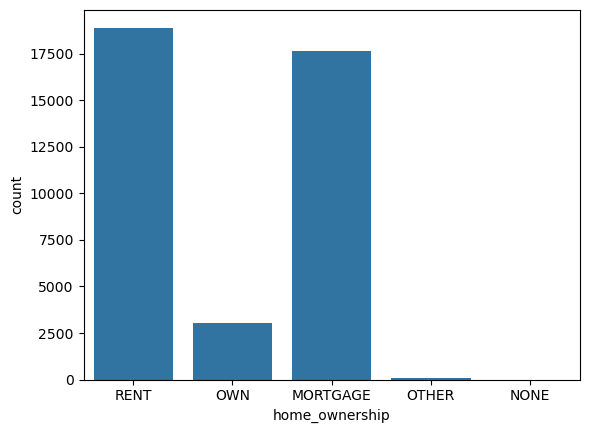

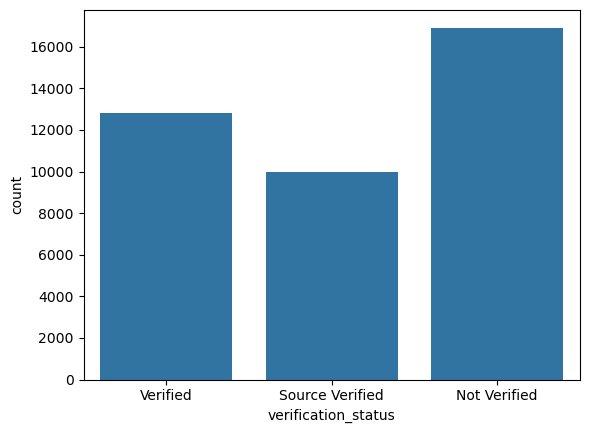

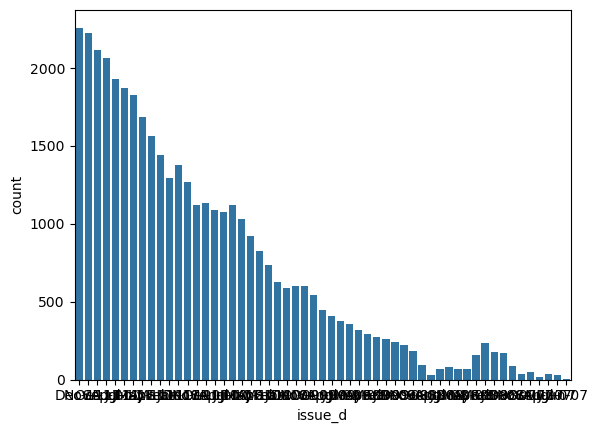

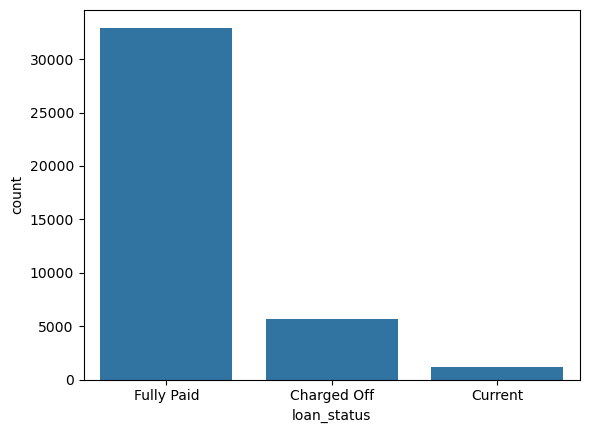

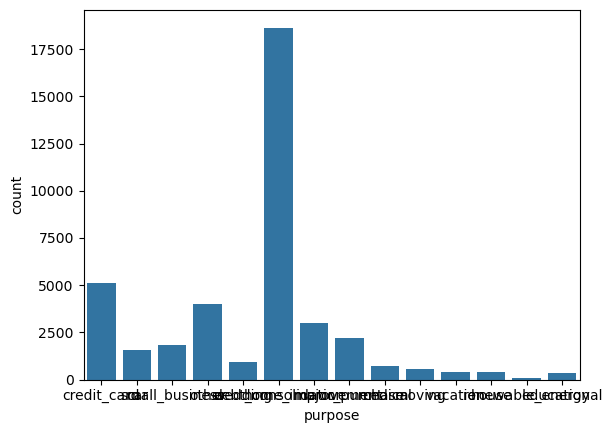

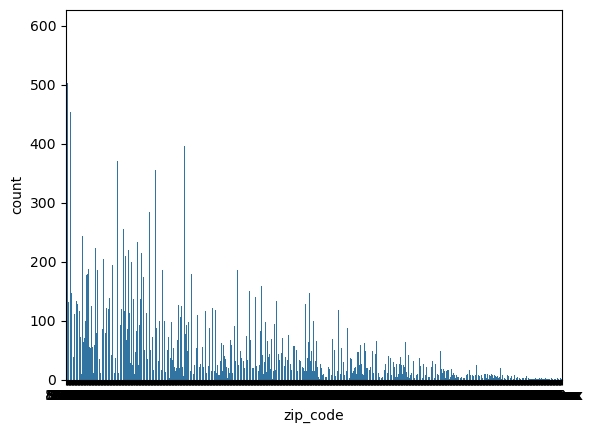

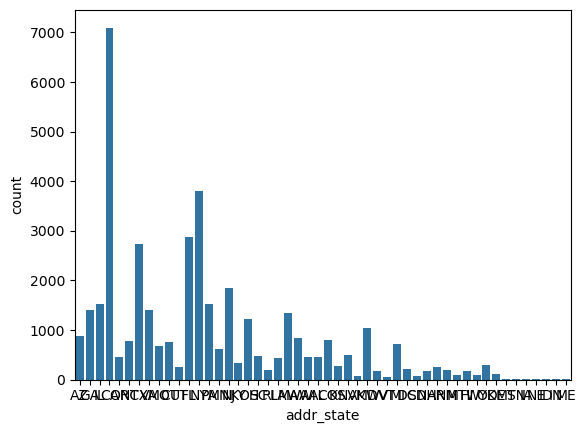

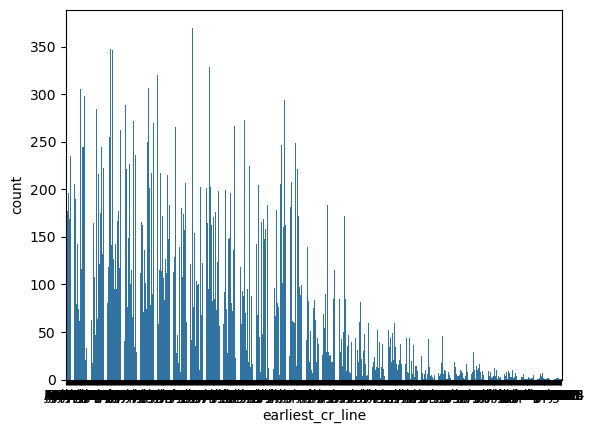

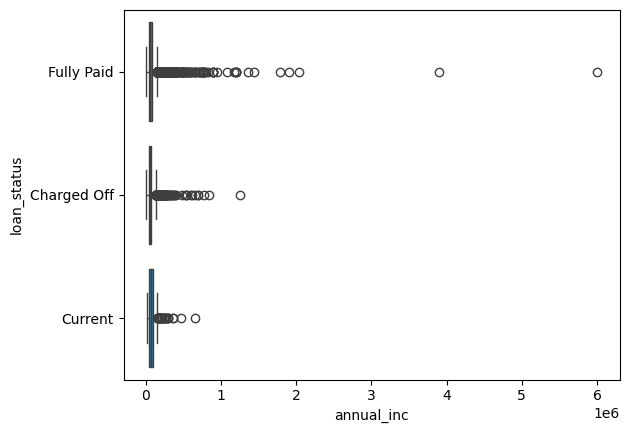

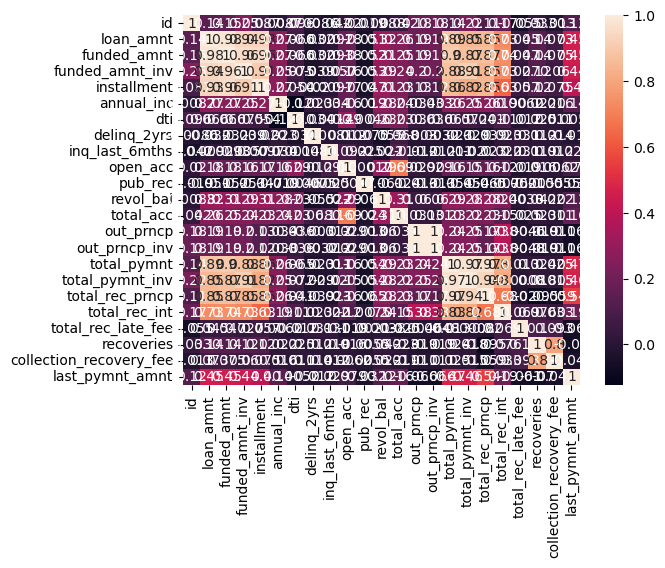

In [6]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

loan_df = pd.read_csv(r'D:\Upgrad\Dataset\loan.csv',low_memory=False)

print(loan_df.shape)
print(loan_df.dtypes)
loan_df.head()
loan_df.tail()
loan_df.value_counts()
pd.options.display.max_rows=100
loan_df = pd.read_csv(r'D:\Upgrad\Dataset\loan.csv',low_memory=False)
print(loan_df)
loan_df.shape
loan_df.info()

loan_df.nunique()

print(loan_df.isnull().sum())
(loan_df.isnull().sum()/(len(loan_df)))*100

loan_df.dropna(axis=1, inplace=True)
loan_df.value_counts()

loan_df.head()
loan_df.shape

loan_df.describe().T
loan_df.describe(include='all').T

cat_cols=loan_df.select_dtypes(include=['object']).columns
num_cols = loan_df.select_dtypes(include=np.number).columns
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

loan_df.dtypes

loan_df.drop(['url','member_id'],axis=1,inplace=True)
loan_df.shape
loan_df.dtypes

loan_df.nunique().sort_values()

for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
      print(column)
      loan_df = loan_df.drop(column, axis=1 )
print("--------------")
loan_df
loan_df.dtypes   

for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2)>= 0.50:
      print(column)
      loan_df = loan_df.drop(column, axis=1 )
loan_df.shape 
loan_df.dtypes

(loan_df.isnull().sum()/(len(loan_df)))*100

cat_cols=loan_df.select_dtypes(include=['object']).columns
num_cols = loan_df.select_dtypes(include=np.number).columns
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)
  
plt.boxplot(loan_df['loan_amnt'],)
plt.show()

plt.boxplot(loan_df['funded_amnt_inv'],)
plt.show()

plt.boxplot(loan_df['annual_inc'],)
plt.show()

sns.boxplot(x=loan_df["int_rate"]) 
plt.show()
loan_df.dtypes

num_cols=(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'])
for numcol in num_cols:
    sns.boxplot(x=loan_df[numcol]) 
    plt.show()
cat_cols=(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line'])
for col in cat_cols:
    sns.countplot(x=loan_df[col])
    plt.show()
#BiVariate Analysis
sns.boxplot(x=loan_df["annual_inc"],y=loan_df["loan_status"]) 
plt.show()


sns.heatmap(loan_df[num_cols].corr(),annot=True)
plt.show()

    

In [ ]:
#
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'category': [True, False, True, False, True]})

# Converting the boolean column to 0 and 1 using map
df['category'] = df['category'].map({True: 1, False: 0})

print(df)


import pandas as pd

# Sample DataFrame

df = pd.DataFrame({'color': ['red', 'blue', 'green', 'red', 'blue']})

# Creating dummy variables with drop_first=True
df_dummies = pd.get_dummies(df, columns=['color'], drop_first=True)

print(df_dummies)

import pandas as pd

# Sample DataFrame with a column for weekdays
df = pd.DataFrame({'weekday': ['Saturday', 'Sunday', 'Monday', 'Saturday', 'Friday', 'Wednesday']})

# Creating dummy variables for the given weekday column
df_weekday_dummies = pd.get_dummies(df, columns=['weekday'], drop_first=True)

print(df_weekday_dummies)

  weekday
0 Saturday
1 Sunday
2 Monday
3 Saturday
4 Friday
5 Wednesday


import pandas as pd

# Sample DataFrame with True/False values
df = pd.DataFrame({
    'weekday_Monday': [True, False, True, False],
    'weekday_Saturday': [False, True, False, True]
})

# Converting True/False to 1/0
df = df.astype(int)
print(df)

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import add_dummy_feature

# Sample DataFrame
df = pd.DataFrame({
    'X1': [10, 20, 30, 40, 50],
    'X2': [15, 25, 35, 45, 55],
    'X3': [10, 20, 30, 40, 60]
})

# Adding a constant column (intercept) to handle VIF calculation correctly
df = add_dummy_feature(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)
A VIF = 1 indicates no multicollinearity.
A VIF between 1-5 suggests moderate multicollinearity.
A VIF above 5 or 10 indicates high multicollinearity, and corrective measures may be needed.